## Setup and packages

In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/Gaussian Network Theoretical/"

In [2]:
N = 10
Rho = np.zeros((N,N))

Rho[0,1] = 0.7

Rho[4,5] = 0.5

Rho[1,6] = 0.3
Rho[5,6] = 0.3

Rho[5,7] = 0.7

Rho[3,8] = 0.3
Rho[7,8] = 0.3

Rho[6,9] = 0.4
Rho[8,9] = 0.2


var_names = GenLabels("X", N)

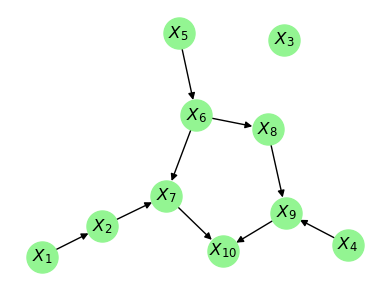

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
gr = nx.from_numpy_array(Rho, create_using = nx.DiGraph)
pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(N), var_names)} )
fig.tight_layout()

# plt.savefig(figures_path + "Network graph - ground truth.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "Network graph - ground truth", bbox_inches='tight')


In [4]:
G_obs_cor = Rho @ np.linalg.pinv(np.eye(N) - Rho)

# Triangular G_obs - correlation

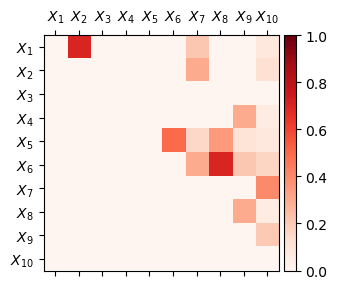

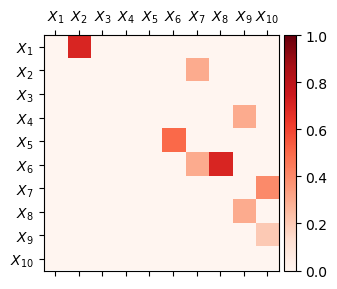

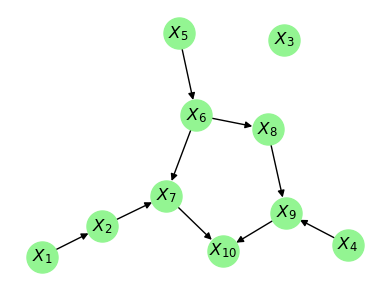

In [32]:
G_obs = G_obs_cor.copy()
G_dir = G_obs @ np.linalg.pinv(np.eye(N) + G_obs)




# G_obs plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_obs, cmap = "Reds", vmin = 0, vmax = 1)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()





# G_dir plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_dir, cmap = "Reds", vmin = 0, vmax = 1)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()






# graph plot
fig, ax = plt.subplots(1,1,figsize=(4,3))
gr = nx.from_numpy_array(G_dir > 1e-10, create_using = nx.DiGraph)
pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(N), var_names)} )
fig.tight_layout()

# Symmetric G_obs - correlation
No tuning except for the cutoff and we can perfectly rediscover G_dir

smallest eig of G_obs : -0.7889728243828672


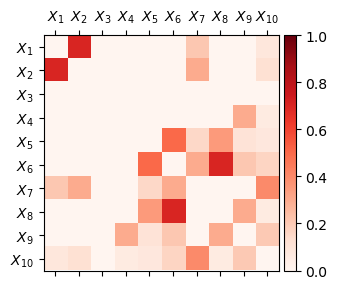

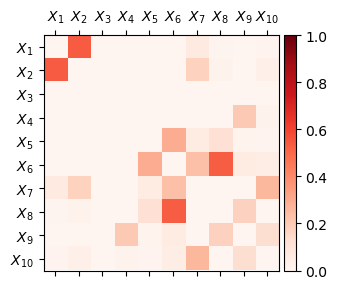

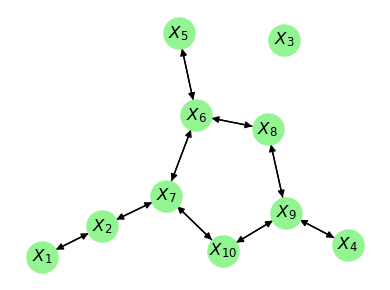

In [33]:
G_obs = G_obs_cor.copy()
G_obs = G_obs + G_obs.T

print(f"smallest eig of G_obs : {np.linalg.eig(G_obs).eigenvalues.min()}")

G_dir = ND(G_obs)




# G_obs plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_obs, cmap = "Reds", vmin = 0, vmax = 1)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()





# G_dir plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_dir, cmap = "Reds", vmin = 0, vmax = 1)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()






# graph plot
fig, ax = plt.subplots(1,1,figsize=(4,3))
gr = nx.from_numpy_array(G_dir > 1.18e-1, create_using = nx.DiGraph)

# 6.4e-2
# 1.18e-1

pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(N), var_names)} )
fig.tight_layout()

# Triangular G_obs - MI

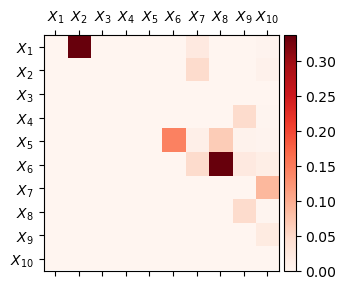

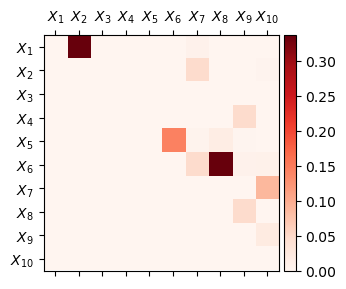

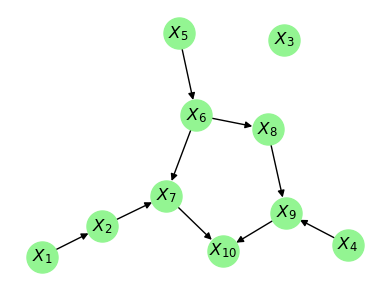

In [25]:
G_obs = G_obs_cor.copy()
G_obs = GaussianCorrelationToMutualInformation(G_obs)

G_dir = G_obs @ np.linalg.pinv(np.eye(N) + G_obs)




# G_obs plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_obs, cmap = "Reds", vmin = 0)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()





# G_dir plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_dir, cmap = "Reds", vmin = 0)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()






# graph plot
fig, ax = plt.subplots(1,1,figsize=(4,3))
gr = nx.from_numpy_array(G_dir > 1.7e-2, create_using = nx.DiGraph)


pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(N), var_names)} )
fig.tight_layout()

# Symmetric G_obs - MI

smallest eig of G_obs : -0.35041475852991605


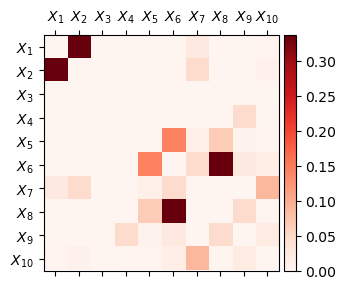

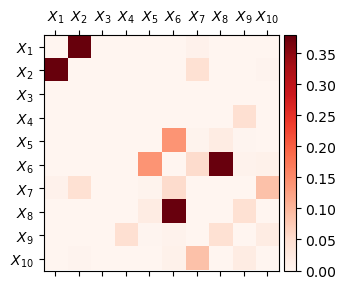

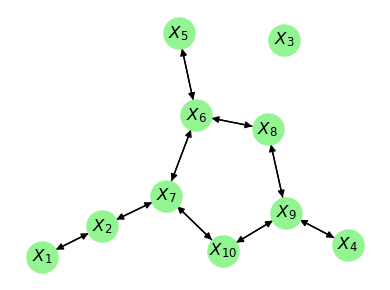

In [24]:
G_obs = G_obs_cor.copy()
G_obs = G_obs + G_obs.T
G_obs = GaussianCorrelationToMutualInformation(G_obs)

print(f"smallest eig of G_obs : {np.linalg.eig(G_obs).eigenvalues.min()}")

# G_dir = ND(G_obs)
G_dir = G_obs @ np.linalg.pinv(np.eye(N) + G_obs)




# G_obs plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_obs, cmap = "Reds", vmin = 0)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()





# G_dir plot
fig, ax = plt.subplots(1,1, figsize = (4,3))
r = ax.matshow(G_dir, cmap = "Reds", vmin = 0)
ax.set_xticks(range(N))
ax.set_xticklabels(var_names)
ax.set_yticks(range(N))
ax.set_yticklabels(var_names)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(r, cax=cax);
fig.tight_layout()






# graph plot
fig, ax = plt.subplots(1,1,figsize=(4,3))
gr = nx.from_numpy_array(G_dir > 1.96e-2, create_using = nx.DiGraph)


pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(N), var_names)} )
fig.tight_layout()

In [23]:
G_dir

array([[-1.27895786e-01,  3.79372644e-01,  3.02769998e-18,
        -6.32105786e-07, -3.84448536e-05, -4.02721136e-04,
         7.51350147e-03,  1.37464890e-04, -9.24905421e-06,
         5.92402265e-04],
       [ 3.79372644e-01, -1.29848020e-01, -1.09009347e-17,
        -3.31040441e-06, -2.27349405e-04, -2.38206915e-03,
         4.45768129e-02,  8.13521058e-04, -4.43928279e-05,
         2.99668371e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.32105786e-07, -3.31040441e-06, -4.09849681e-18,
        -2.23440210e-03, -7.56791542e-05, -3.55294543e-04,
        -5.67104876e-05, -2.10983946e-03,  4.73511836e-02,
         8.54540268e-04],
       [-3.84448536e-05, -2.27349405e-04,  3.81996068e-18,
        -7.56791542e-05, -2.14924960e-02,  1.40083924e-01,
         4.94146335e-03,  1.95054108e-02,  1.56652334e-03,
         1.